# Project 3: Reddit Web API & Classification

## Problem Statement

<font color = blue>The Biden presidential election campaign team is trying to capture more voter share, specifically in the digital space where republician presidential candidate Donald Trump holds a stronger and more effective presence. By developing a text classifier to analyze online postings, using reddit as a base reference, the campaign team hopes to gain more insights into understanding sentiment in both the democratic and republican camps. 2 models: Logistic Regression and Naive Bayes, will be evaluated. This will allow the team to optimise resources and online efforts for the most impactful outreach and also use it to analyze other media platforms. Success will be measured by having a high degree of classification accuracy above the baseline score.
</font>    

## Executive Summary

<font color = blue>The Biden Presidential Election Campaign Team is poised to help strategise, coordinate and execute the Biden's campaign efforts in the 2020 Presidential Race. Part of the key initiatives taken on within the team's strategic plan would be to use data driven methods such as web classification models to identify opportunities and weaknesses for structuring the campaigns.

Currently, the presidential race is down to very narrow margins. The republican representative Donald Trump has a stronger and more effective online presence due to his engagement on social media platforms. This presents serious concern in a tight race given the volatility of voter sentiment. Due to the electorates being more online savvy in this generation, the campaign team would like to secure more support by gaining insight of online sentiment and to appeal to potential voters through these findings.
    
<br />
To achieve this, the Biden campaign team is hoping to leverage on web api data extraction and natural language classifier techniques on various web discussion platforms. To construct a base reference, data pulled from subreddits under the democrat and republican categories will be used as a basis to train and select the best classifier model. With the use of the classifier, the team are better able to monitor trending topics that voters are concerned about most and gauge online sentiment for opportunities. This would enable Biden to be better prepared in communicating the most effective message on his trail.
    
Being staffed with experienced data analysts that have served in previous election campaign, the Biden campaign election team is seeking to gather more precise information on the US voter base. With this information, the firm hopes to optimize strategy and resources from information gathered using the developed model.
</font>

## Data Dictionary

<font color=black><b>Reddit Data Dictionary (after cleaning)</b></font>
    
|Feature                        |Type    |Dataset|Description
|:-----------------------       |:---    |:---|:---
|<b>subreddit</b>                |string|project_data|Subreddit category
|<b>title</b>                     |string |project_data|Post title text content


## Methodology

<font color=blue>
The source of information to be extracted will be from the 2 respective subreddits:
   <br \>  
<ul>
    <li>Subreddit 1: r/democrat - source for democratic party related discussion (1)</li>    
    <li>Subreddit 2: r/republican - source for republican party related discussion (0)</li> 
</ul>    
    
These sources will help gauge left or right sentiment and what sort of topics is trending for each side.
    
For the scope of this reddit analysis, there will be mainly 2 text vectorization methods used (<b>Count</b> & <b>TFID</b>) and 2 models (<b>Naive Bayes</b> and <b>Logistic Regression</b>) used for each method in evaluating the best classifer. <b>GridSearchCV</b> will be used to perform hyper parameter tuning in order to determine the optimal values for a given model. Hence the following testing steps will be performed in this sequence:

<ul>
    <li>CountVectorizer with Logistic Regression Classifer</li>    
    <li>CountVectorizer with Naive Bayes Classifier</li> 
    <li>TfidfVectorizer with Logistic Regression Classifer</li> 
    <li>TfidfVectorizer with Naive Bayes Classifier</li> 
</ul>
    
The merged data will be subject to the following NLTK methods:
    <ul>
    <li>Tokenization</li>
    <li>Stemming</li> 
    <li>Stopwords Filtering</li> 
</ul>

</font>

## <font color = black>Data Gathering</font>

### <font color = blue>Please refer to the <font color = red><b>P3_01_Data_Scraping</b></font> file for the data scraping & collection steps</font>

## <font color = black>Preprocessing</font>

### Import the necessary libaries

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
%matplotlib inline

### Load the Data File

In [2]:
df = pd.read_csv('../project_3/project_data.csv')
df.head()

,subreddit,title
0,democrats,Hey All! I made a documentary about Joe Biden....
1,democrats,It’s Time for a Blue Wave to Restore America.
2,democrats,"In Scathing Letter, More Than 80-Percent of Fa..."
3,democrats,Mark Cuban endorses Biden on Hannity: He 'actu...
4,democrats,Biden Surge and Trump Failures Expand Electora...


### Check values are even and set Baseline Score

In [3]:
# Check numbers of each subreddit category

df['subreddit'].value_counts()

Republican    810
democrats     810
Name: subreddit, dtype: int64

<font color=blue><b>The baseline score is thus 0.5 </b> <br />Note: Earlier in the data scraping file, row values were dropped to equalize both data sets.</font>

### Tokenize & Stem the Title through a Custom Function

In [4]:
def stem_function(words):
    stemmer = PorterStemmer()
    tokens = word_tokenize(words)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

df['tokenized'] = df['title'].apply(stem_function)

### Test that tokenization is working

In [5]:
df['tokenized'][0]

'hey all ! I made a documentari about joe biden . I hope my fellow dem love thi as much as I love make it .'

In [6]:
# Inspect the text content in the new "tokenized" column

df.head()

,subreddit,title,tokenized
0,democrats,Hey All! I made a documentary about Joe Biden....,hey all ! I made a documentari about joe biden...
1,democrats,It’s Time for a Blue Wave to Restore America.,It ’ s time for a blue wave to restor america .
2,democrats,"In Scathing Letter, More Than 80-Percent of Fa...","In scath letter , more than 80-percent of facu..."
3,democrats,Mark Cuban endorses Biden on Hannity: He 'actu...,mark cuban endors biden on hanniti : He 'actua...
4,democrats,Biden Surge and Trump Failures Expand Electora...,biden surg and trump failur expand elector map


### Label Encode the Target Set

<font color=blue>

Assign the following values for the following variables:
   <ul>
       <li>democrats - 1 </li> 
       <li>republican - 0 </li>     
   </ul>
</font>

In [7]:
df['subreddit']  = df['subreddit'].apply(lambda x: x.lower())
df['subreddit'] = df['subreddit'].map({'democrats':1,'republican': 0})
df['subreddit'].head(2)

0    1
1    1
Name: subreddit, dtype: int64

In [8]:
# Check if encoding is successful
df['subreddit'].tail(2)

1618    0
1619    0
Name: subreddit, dtype: int64

## <font color = black>Exploratory Data Analysis (EDA)</font>

### Outliers

<font color=blue>The presence of outliers is not really applicable for this natural language processing project since the word syntax is such that certain words are needed to be more commonly used that another. The closest treatment would be during the modeling portion where the words below or beyond a certain frequency would be removed.</font>

### Visualisation of Individual Subreddits

<font color=blue>We would like to examine the type of word frequencies that appear for each individual reddit in the absence of any pre-processing.</font>

In [9]:
# Load both the democratic data set and the republican data set
dem = pd.read_csv('../project_3/democrats.csv')
rep = pd.read_csv('../project_3/republicans.csv')

<font color=blue>Check that both files have been imported correctly</font>

In [10]:
dem.head(2)

,subreddit,title,selftext
0,democrats,Hey All! I made a documentary about Joe Biden....,NaN
1,democrats,It’s Time for a Blue Wave to Restore America.,NaN


In [11]:
rep.head(2)

,subreddit,title,selftext
0,Republican,New evidence shows it is time to charge Joe Bi...,NaN
1,Republican,Just putting this out there.,NaN


<font color=blue>Remove some key words for better visualization. Stop words will not be included for now</font>

In [12]:
dem['title']  = dem['title'].apply(lambda x: x.lower())
rep['title']  = rep['title'].apply(lambda x: x.lower())

In [13]:
remove_words= ['democrat','republican','trump','biden','joe']
dem['title'] = dem['title'].str.replace('|'.join([re.escape(s) for s in remove_words]), '')
rep['title'] = rep['title'].str.replace('|'.join([re.escape(s) for s in remove_words]), '')

### Prepare the Count Vectorizor to convert into Matrix Representation

In [14]:
# instantiate count vectorizer

cvc = CountVectorizer()

In [15]:
#fit transform text for republican subreddit data as an exmple

rep_countvec = cvc.fit_transform(rep['title'])
rep_countvec = rep_countvec.toarray()

In [16]:
# verify the word count is still correct

len(rep_countvec)

810

In [17]:
#creating dataframe to store word frequency counts for republicans

rt = pd.DataFrame(rep_countvec, columns = cvc.get_feature_names())
rep_topwords = rt.sum(axis=0).sort_values(ascending=False)

### <font color=red> Barplot & Word Cloud Visualization </font>

### Generate the Democratic Word Cloud

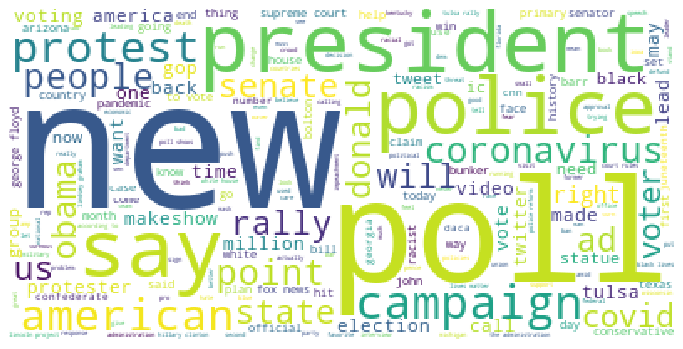

In [18]:
dem_cloud = WordCloud(background_color ='white').generate(' '.join(dem['title']))

plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(dem_cloud)
plt.axis("off")
plt.show()

<font color=blue>Some of top words for the Democratic (exluding duplicates and the word "new" which is not a keyword) can be inferred as such:<br />
    <ul>
    <li><b>poll</b> - Presumably linked to the presidential polls</li>
    <li><b>president</b> - Presumably linked to controversial Donald Trump</li>
    <li><b>police</b>- Presumably linked to the protests and police reform legislations</li>
    <li><b>protest</b> - Presumably linked to the George Floyd protests</li>
    <li><b>campaign</b> - Presumably linked to ongoing presidential campaign</li>
    <li><b>coronavirus</b> - Presumably linked to the current coronavirus pandemic</li>
    </ul>
The democratic crowd strongly follows the presidential campaign very closely and also makes mentions of Trump (either critically or newsworthy). The racial and police riots are also strongly trending. Finally, the democratic group are also concerned over the ongoing coronavirus pandemic.    
    
</font>

### Generate the Republican Word Cloud

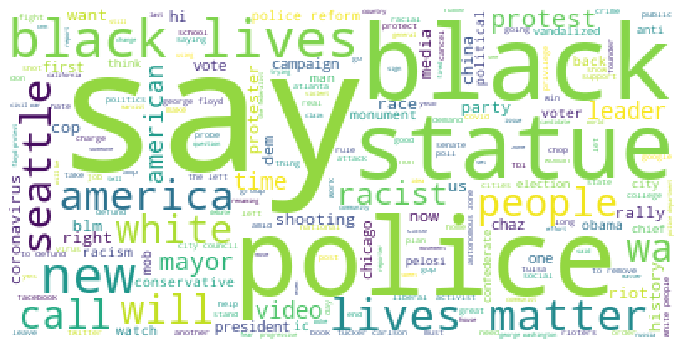

In [19]:
rep_cloud = WordCloud(background_color ='white').generate(' '.join(rep['title']))

plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(rep_cloud)
plt.axis("off")
plt.show()

<font color=blue>Some of top words for the Republicans (exluding duplicates) can be inferred as such:<br />
    <ul>
    <li><b>police</b> - Presumably linked to the protests and police reform legislations</li>
    <li><b>black</b> - Presumably linked to the protests and Black-Lives-Matter movement</li>
    <li><b>statue</b>- Presumably linked to the statue vandalization incident</li>
    <li><b>lives</b> - Presumably linked to the protests and Black-Lives-Matter movement</li>
     <li><b>seattle</b> - Presumably linked to protests in Seattle over police funding</li> </ul>
The republican crowd mainly follows news regarding the police embroiled in the racial protests and also the Black-Lives-Matter movement itself.    
</font>

### Barplot of Republican Top Words

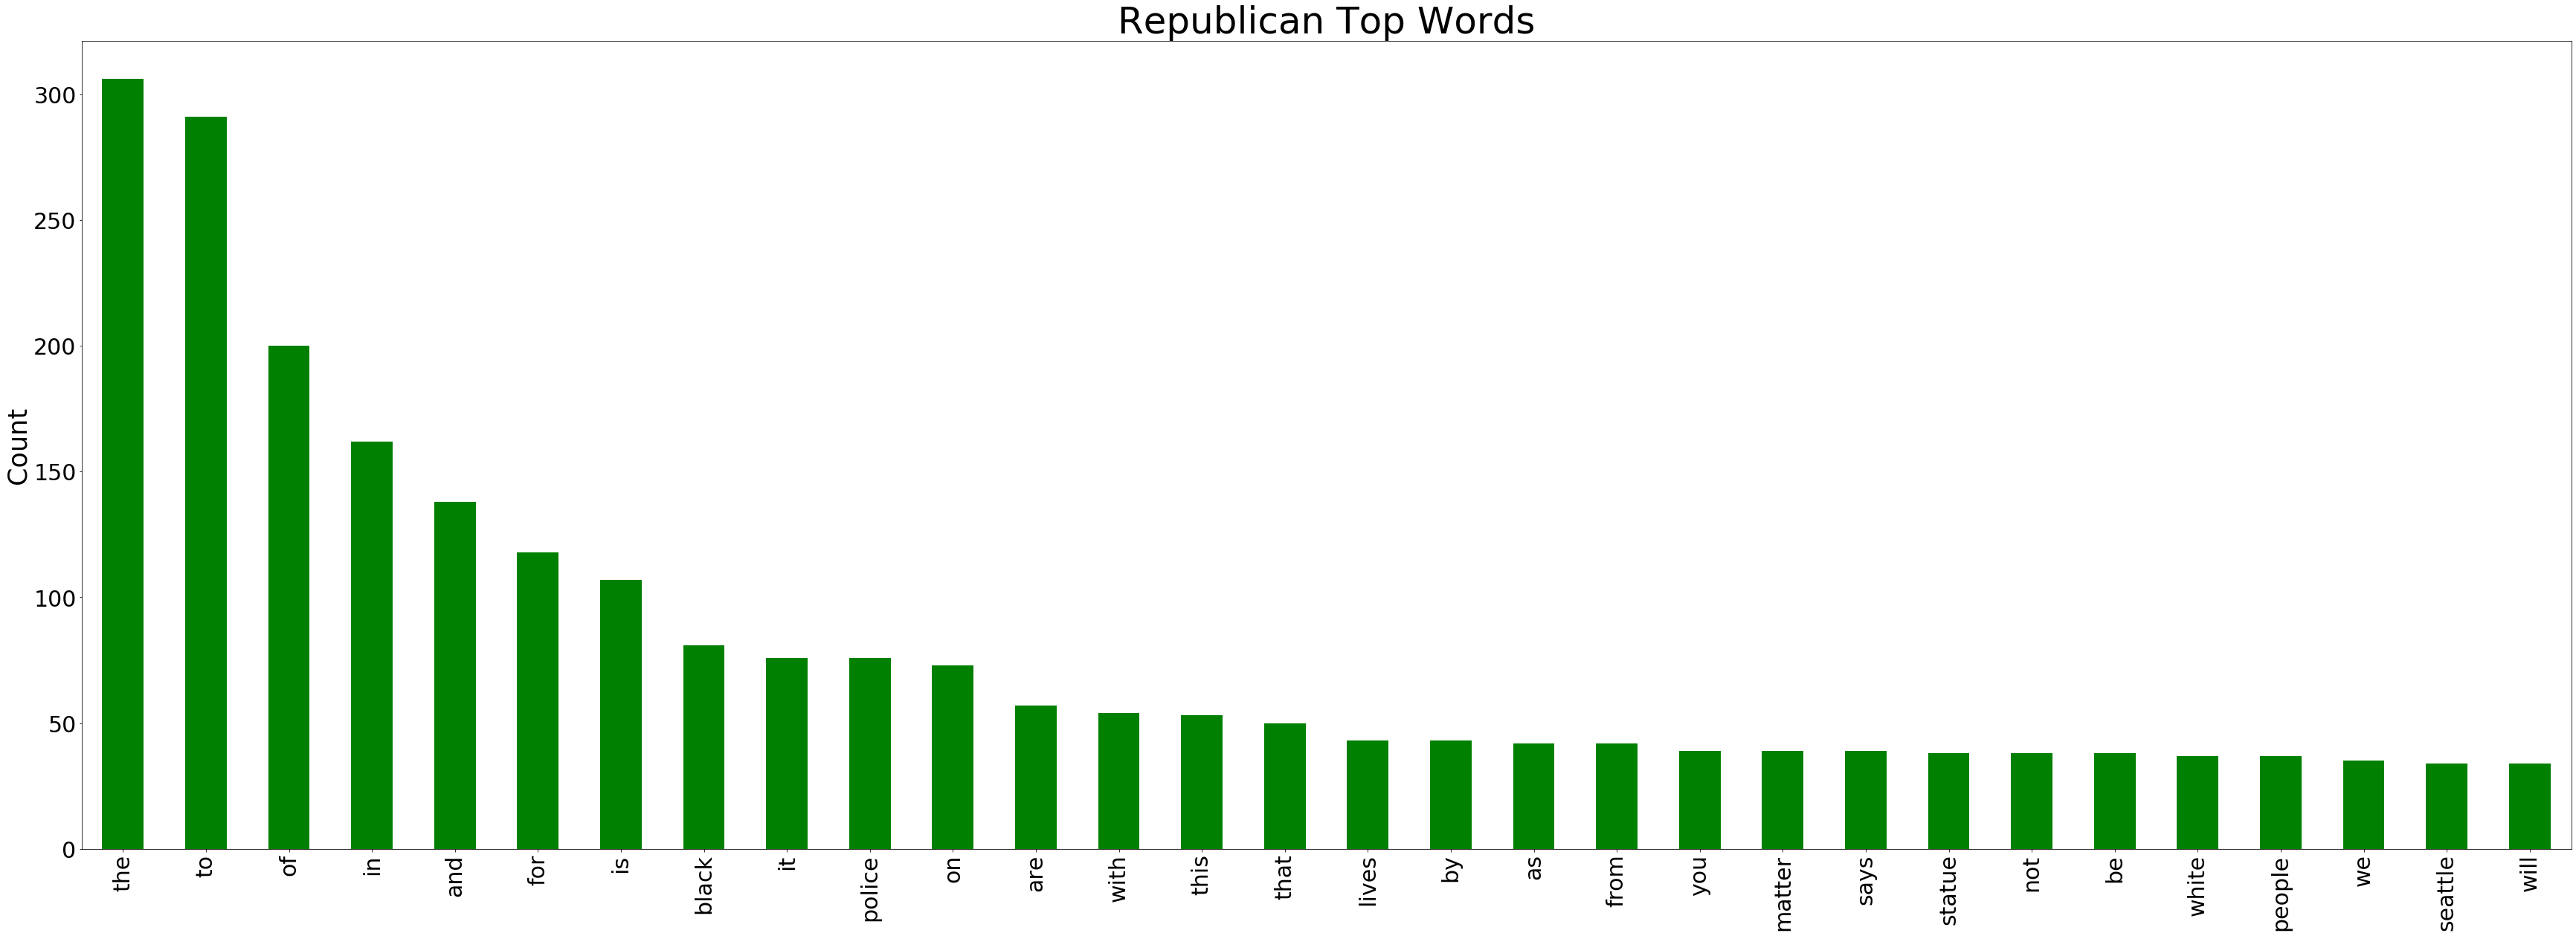

In [20]:
#plot barchart for frequency of top republican reddit words
[plt.cm.Paired(np.arange(len(df)))]
pd.Series(rep_topwords.head(30)).plot.bar(figsize=(60,20),color='g')
plt.title('Republican Top Words', fontsize =50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('Count', fontsize=35);

<font color=blue> Ignoring the stop words, the key top few words are still words like: <font color=black><b>black</b></font>,<font color=black><b>police</b></font>,<font color=black><b>lives</b></font>,<font color=black><b>statue</b></font>,<font color=black><b>white</b></font> : all which are very identical match to the word cloud.

### Further Inferences on Individual Reddits

<font color=blue>Based on these initial EDA findings of keywords alone, we have a rudimentary and important understanding of the main issues facing both camps and how we should structure our approach towards resolving or aligning Biden's campaign alongside these concerns. These strategies will be elaborated more in detail during the conclusion and recommendations.</font>

### Pre-Modelling Visualization of Word Frequency for Combined Data

In [21]:
combined_cloud = WordCloud(background_color ='white').generate(' '.join(df['tokenized']))

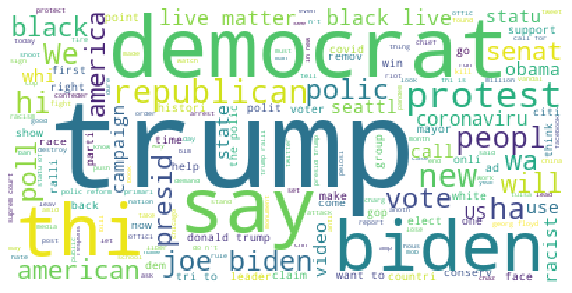

In [22]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(combined_cloud)
plt.axis("off")
plt.show()

<font color=blue> It is not very surprising to find that the presidential candidates and the ongoing protests are the main keywords that appear for the merged word cloud.
</font>

## <font color=red>Modeling using the Count Vectorizer Method</font>

<font color=blue>The CountVectorizer implements both tokenization (breaking text documents unique words or tokens) and occurrence counting in a single class. This enables the word blocks to be broken up into an individual word matrix.</font>

## <font color=black>Model Preparation</font>

### Set Train Test Split

In [23]:
#Separate data into comment text (features) and subreddit (target variable)
X = df['title']
y = df['subreddit']

#Train test split. 
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,stratify=y)

In [24]:
# Do a check on the feature set to make sure data is in order
X.head()

0    Hey All! I made a documentary about Joe Biden....
1        It’s Time for a Blue Wave to Restore America.
2    In Scathing Letter, More Than 80-Percent of Fa...
3    Mark Cuban endorses Biden on Hannity: He 'actu...
4    Biden Surge and Trump Failures Expand Electora...
Name: title, dtype: object

In [25]:
X.shape

(1620,)

In [26]:
# Do a check on the target set to make sure data is in order
y.head(2)

0    1
1    1
Name: subreddit, dtype: int64

In [27]:
y.tail(2)

1618    0
1619    0
Name: subreddit, dtype: int64

In [28]:
y.shape

(1620,)

In [29]:
y_test.shape

(405,)

### Preset the Stop Words

In [30]:
# Exclude key words such as the subreddit topics from being used (eg. democrat, republican)

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('republican')
stopwords.append('republicans')
stopwords.append('democrats')
stopwords.append('democrat')
stopwords.append('trump')
stopwords.append('biden')
stopwords.append('bjoe')

### <font color=red>Modeling using Logistic Regression Classifier</font>

<font color=blue>Logistic regression models the probabilities for classification problems with two possible outcomes. The predictions of Logistic Regression are in the form of probabilities of an event occurring. Thus, the results of logistic regression range between 0-1. When selecting the model for the logistic regression analysis, another important consideration is the model fit. Adding independent variables to a logistic regression model will always increase the amount of variance. However, adding more and more variables to the model can result in overfitting, which reduces the generalizability of the model beyond the data on which the model is fit.</font>

### Pipeline Creation for Logistic Regression

In [31]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

In [32]:
pipe_params = {
    'cvec__max_features': [1000, 1500,2000,2500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__stop_words':[stopwords],
    'cvec__ngram_range': [(1,1), (1,2)],
    'lr__penalty':['l1','l2'],
    'lr__solver':['liblinear'],
    'lr__C':np.logspace(-5,0,100)
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5, verbose =1, n_jobs=-1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 6400 candidates, totalling 32000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 2936 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 4736 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 6936 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9536 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 12536 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 15936 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 19736 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 23936 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 28536 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 32000 out of 32000 | elapsed:  6.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [33]:
# Trining data without cross-validation

gs.score(X_train, y_train)

0.8502057613168724

In [34]:
# Score it on the testing data
gs.score(X_test, y_test)

0.691358024691358

In [35]:
# best score on the training data which has undergone cross-validation
gs.best_score_ 

0.6823045267489711

In [36]:
# best parameters on the training data

gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 1500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',

In [37]:
# Display the optimal parameters used for this particular model

gs.best_estimator_.steps

[('cvec',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=0.9, max_features=1500, min_df=2,
                  ngram_range=(1, 2), preprocessor=None,
                  stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                              'ourselves', 'you', "you're", "you've", "you'll",
                              "you'd", 'your', 'yours', 'yourself', 'yourselves',
                              'he', 'him', 'his', 'himself', 'she', "she's",
                              'her', 'hers', 'herself', 'it', "it's", 'its',
                              'itself', ...],
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('lr',
  LogisticRegression(C=0.09770099572992247, class_weight=None, dual=False,
                     fit_intercept=True, intercept_scal

### <font color=red>Modeling using Naive Bayes Classifier</font>

<font color=blue>Naive Bayes is a classification algorithm for binary (two-class) and multiclass classification problems. It  works on assumptions of independence in the model, rather than the particular distribution of each feature. A Naive Bayes model assumes that each of the features it uses are conditionally independent of one another given some class. Multinomial Naive Bayes classifier is a specific instance of a Naive Bayes classifier which uses a multinomial distribution for each of the features. Weakness of using Naive Bayes is that the word features are rarely independent of each other in a real language context. </font>

### Pipeline Creation for Naive Bayes

In [38]:
pipe2 = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [39]:
pipe_params2 = {
    'cvec__max_features': [1000, 1500,2000,2500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__stop_words':[stopwords],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs2 = GridSearchCV(pipe2, param_grid=pipe_params2, cv=5, verbose =1, n_jobs=-1)
gs2.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [40]:
gs2.score(X_train, y_train)

0.8897119341563786

In [41]:
# Test score using the best parameters
gs2.score(X_test, y_test) 

0.7061728395061728

In [42]:
# The best training score after going through validation
gs2.best_score_ 

0.6790123456790124

In [43]:
# Best parameters used to get optimal scores
gs2.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',

In [44]:
gs2.best_estimator_.steps

[('cvec',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=0.9, max_features=2000, min_df=2,
                  ngram_range=(1, 2), preprocessor=None,
                  stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                              'ourselves', 'you', "you're", "you've", "you'll",
                              "you'd", 'your', 'yours', 'yourself', 'yourselves',
                              'he', 'him', 'his', 'himself', 'she', "she's",
                              'her', 'hers', 'herself', 'it', "it's", 'its',
                              'itself', ...],
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

## <font color=red>Modeling using the Tfid Vectorizer Method</font>

<font color=blue>Next, a different vectorizer (Tfid) will repeated using the same models for evaluation purpose where:
      
TF Score (Term Frequency) - Considers the number of times a term appears in a document in proportion to the number of terms in the document.    
    
IDF Score (Inverse Document Frequency) - Uses the frequency of a term in the collection for weighting and ranking.
    </font>

### <font color=red>Tfid Modeling using Logistic Regression Classifier</font>

### Pipeline Creation for Logistic Regression

In [45]:
pipe3 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr2', LogisticRegression())
])

In [46]:
pipe_params3 = {
    'tvec__max_features': [1000, 1500,2000,2500],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__stop_words':[stopwords],
    'tvec__ngram_range': [(1,1), (1,2)],
    'lr2__penalty':['l1','l2'],
    'lr2__solver':['liblinear'],
    'lr2__C':np.logspace(-5,0,100)
}
gs3 = GridSearchCV(pipe3, param_grid=pipe_params3, cv=5, verbose =1, n_jobs=-1)
gs3.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 6400 candidates, totalling 32000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 4856 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 7056 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 9656 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 12656 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 16056 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 19856 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 24056 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 28656 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 32000 out of 32000 | elapsed:  6.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [47]:
gs3.score(X_train, y_train)

0.9135802469135802

In [48]:
gs3.score(X_test, y_test)

0.7086419753086419

In [49]:
gs3.best_score_ 

0.6806584362139918

In [50]:
gs3.best_params_

{'lr2__C': 1.0,
 'lr2__penalty': 'l2',
 'lr2__solver': 'liblinear',
 'tvec__max_df': 0.9,
 'tvec__max_features': 2000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
 

In [51]:
gs3.best_estimator_.steps

[('tvec',
  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.float64'>, encoding='utf-8',
                  input='content', lowercase=True, max_df=0.9, max_features=2000,
                  min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                  smooth_idf=True,
                  stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                              'ourselves', 'you', "you're", "you've", "you'll",
                              "you'd", 'your', 'yours', 'yourself', 'yourselves',
                              'he', 'him', 'his', 'himself', 'she', "she's",
                              'her', 'hers', 'herself', 'it', "it's", 'its',
                              'itself', ...],
                  strip_accents=None, sublinear_tf=False,
                  token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                  vocabulary=None)),
 ('lr2',
  LogisticRegression(C=1.0, c

### <font color=red>Tfid Modeling using Naive Bayes Classifier</font>

### Pipeline Creation for Naive Bayes

In [52]:
pipe4 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [53]:
pipe_params4 = {
    'tvec__max_features': [1000, 1500,2000,2500],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__stop_words':[stopwords],
    'tvec__ngram_range': [(1,1), (1,2)]
}
gs4 = GridSearchCV(pipe4, param_grid=pipe_params4, cv=5, verbose =1, n_jobs=-1)
gs4.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [54]:
gs4.score(X_train, y_train)

0.9004115226337449

In [55]:
gs4.score(X_test, y_test)

0.7037037037037037

In [56]:
gs4.best_score_ 

0.6823045267489711

In [57]:
gs4.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 2000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',

In [58]:
gs4.best_estimator_.steps

[('tvec',
  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.float64'>, encoding='utf-8',
                  input='content', lowercase=True, max_df=0.9, max_features=2000,
                  min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                  smooth_idf=True,
                  stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                              'ourselves', 'you', "you're", "you've", "you'll",
                              "you'd", 'your', 'yours', 'yourself', 'yourselves',
                              'he', 'him', 'his', 'himself', 'she', "she's",
                              'her', 'hers', 'herself', 'it', "it's", 'its',
                              'itself', ...],
                  strip_accents=None, sublinear_tf=False,
                  token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                  vocabulary=None)),
 ('nb', MultinomialNB(alpha=1.0, class

## Consolidate all Vector Models and Identify Best Performing Model

<font color=blue>The train and test scores using the best hyperparameters would be consolidated for review and selection. The criteria chosen for the model selection would be based on the highest cross-validated training score (<b>best_score_</b>) amongst all the models.</font>

In [59]:
result =[['Baseline Model',0.5, 'NA', 'NA'],['CountVec_Logistic',gs.best_score_,gs.score(X_train, y_train),gs.score(X_test, y_test)],['CountVec_Multinomial',gs2.best_score_,gs2.score(X_train, y_train),gs2.score(X_test, y_test)],['Tfid_Logistic',gs3.best_score_,gs3.score(X_train, y_train),gs3.score(X_test, y_test)],['Tfid_Multinomial',gs4.best_score_,gs4.score(X_train, y_train),gs4.score(X_test, y_test)]]
score = pd.DataFrame(result, columns=['Model Combination', 'Best Score', 'Train Accuracy', 'Test Accuracy'])
score

,Model Combination,Best Score,Train Accuracy,Test Accuracy
0,Baseline Model,0.500000,NA,NA
1,CountVec_Logistic,0.682305,0.850206,0.691358
2,CountVec_Multinomial,0.679012,0.889712,0.706173
3,Tfid_Logistic,0.680658,0.91358,0.708642
4,Tfid_Multinomial,0.682305,0.900412,0.703704


<font color=blue>From the findings above, we can deduce that the model with the best accuracy would be the <font color=black><b>Logistic Regression Classifier</b></font> using the <font color=black><b>Count Vectorization</b></font> method since the score of <font color=black><b>0.68</b></font> is the highest amongst all the other model combinations. Also, the pre-training score and test scores for countvec logistic had an approximate <font color=black><b>0.17 delta</b></font>, which was the lowest amongst all the options. This reinforces the rationale for selection as it shows that the training data was the lowest in terms of overfitting. And overall, it is an improved accuracy over the initial baseline score of 0.5.</font>

In [60]:
# Review the best parameters leading to most ideal score
gs.best_estimator_.steps

[('cvec',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=0.9, max_features=1500, min_df=2,
                  ngram_range=(1, 2), preprocessor=None,
                  stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                              'ourselves', 'you', "you're", "you've", "you'll",
                              "you'd", 'your', 'yours', 'yourself', 'yourselves',
                              'he', 'him', 'his', 'himself', 'she', "she's",
                              'her', 'hers', 'herself', 'it', "it's", 'its',
                              'itself', ...],
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('lr',
  LogisticRegression(C=0.09770099572992247, class_weight=None, dual=False,
                     fit_intercept=True, intercept_scal

<font color=blue>The optimal pipe model parameters are:<br />
    <ul>
    <li><b>max_df</b> - 0.9</li>
    <li><b>min_df</b> - 2</li>
    <li><b>max_features</b> - 1500</li>
    <li><b>ngram_range</b> - (1, 2)</li>
    <li><b>penalty</b>- l2</li>
    </font>

### Analyze confusion matrix and coefficients for the selected classifier model

In [61]:
predictions = gs.predict(X_test)

In [62]:
# Generate a confusion matrix.
confusion_matrix(y_test, predictions)

array([[144,  59],
       [ 66, 136]], dtype=int64)

In [63]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [64]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 144
False Positives: 59
False Negatives: 66
True Positives: 136


In [65]:
# Assign a variable to the best estimator

best_lr= gs.best_estimator_

In [66]:
# Generate predictions using the best estimator model

best_lr_y_pred = best_lr.predict(X_test)
print(classification_report(y_test, best_lr_y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       203
           1       0.70      0.67      0.69       202

    accuracy                           0.69       405
   macro avg       0.69      0.69      0.69       405
weighted avg       0.69      0.69      0.69       405



<font color=blue>The classification report shows that the precision of the prediction between both Democrats and Republicans are approximately the same at around 70%. The recall is also almost similarly matched with the model having a ~4% harder time detecting that a democrat post comes from the democrat reddit. This suggests that the republicans have more distinguishing keywords in their word base. The almost similar f1-score also indicates that there is a very equal balance between the precision and recall.
</font>

In [67]:
best_lr.named_steps['lr'].coef_

array([[ 0.24896955,  0.06028834,  0.05301011, ..., -0.06938999,
         0.02641956, -0.1729713 ]])

In [68]:
# Construct a dataframe containing the features and coefficients for comparison
coefs = pd.DataFrame(gs.best_estimator_.steps[1][1].coef_).T
coefs.columns = ['coef']
coefs['word'] = gs.best_estimator_.steps[0][1].get_feature_names()
coefs = coefs[['word','coef']]
coefs = coefs.sort_values('coef')

In [69]:
# Reconfirm the number of coefficients which should be matching the ideal feature size
len(coefs)

1500

In [70]:
# Examine the top few performing ngrams
coefs.head(10)

,word,coef
125,black,-0.478354
1172,statue,-0.427404
186,china,-0.395839
1052,seattle,-0.380208
649,left,-0.372897
193,city,-0.338466
64,america,-0.322226
719,media,-0.314497
642,leaders,-0.311132
712,mayor,-0.297485


<font color=blue>Some of the notable negative top few correlation words having influence on the model are:<br />
    <ul>
    <li><b>black</b> - Presumably linked to the protests and Black-Lives-Matter movement</li>
    <li><b>statue</b> - Presumably linked to statue vandalization incident</li>
    <li><b>china</b>- Presumably linked to the trade wars and disputes with China or the coronavirus situation</li>
    <li><b>seattle</b> - Presumably linked to the police funding dispute in Seattle</li>
        <li><b>left</b> - Presumably refers to the democrats</li>
    </ul>   
If we compare these words to the prominent top words in the individual subreddits, we can infer that a common range of issues are equally affecting both the democratic and republican supporters.
    
 <b>However, it must be stressed that although these words have a heavy influence on the model performance, care should be taken to review if the real life post sentiment starts to shift according to new events. Most of the words having that correlation will soon be overtaken by new events, rendering this model to be less effective unless it is trained against a new and more recent word base.</b>   
    
</font>

## <font color=black>Conclusions & Recommendations</font>

<font color=blue>
    
The genesis of this project was to compete strongly with Trump in popularity presidential polls by finding and developing a classification model that could accurately identify web posts as belonging to democratic or republican voters. This would gain insight as to the trending issues among both camps and help the Biden campaign team forge a solid strategy to win over more supporters.
   
To recap, the following methodology was performed to meet these objectives:
<ul>
<li>Information was scraped from 2 relevant subreddits belonging to Democratic and Republican board as a starting basis</li>
<li>The individual subreddit data was first analyzed for the word trends during EDA</li>
<li>The merged data was also analyzed for the word trends during EDA</li>
<li>The training and test splits were created</li>
<li>Subsequently, four combination of vector-classification models were run to derive the best performing model</li>
<li>Gridsearch hyperparameters tuning and stopwords were used to refine the model</li>
<li>Parameters and word coefficients of the selected classification model were also derived</li>
 </ul>   
The best classification model identified for the campaign team turned out to be the Logistic Regression using the Count Vectorizer. The use of this tool could achieve training accuracy rates of up to 68%.
    
Also identified, were important top performing key words that were common to both the democrats and republicans through the barplot and wordcloud visualizations. To name the most relevant ones were words pertaining to the Black-Lives-Movement (BLM), the ongoing racial protests, the involvement of the police in the riots, the coronavirus and also both the presidential candidates.
    
Using the these results, the following <b>inferences</b> can be made:
<ul>   
<li>Unity with the black community will be an important card to play given that the race gap is narrow and that Biden has the possible chance to reinforce and win over more black support</li>
<li>Trump is a very prominent and controversial talking point amongst both camps and hence a strategy catered towards him might sway public opinion</li>   
<li>Although the pandemic situation has been temporarily overshadowed by the Minnneapolis riots, it still remains a concern amongst the electorate</li> 
<li>Recency of events is a very critical component of how the model functions and is also very relevant to the presidential race given it reacts to ever changing events daily</li> 
</ul>   
To this end, the campaign committee makes the following <b>recommendations</b>:
<ul>
<li>Communicate a message of solidarity with the black community</li>  
<li>Get endorsement from prominent black figures such as Obama</li>      
<li>Gain publicity by engaging in black community events such as talk shows</li>     
<li>Consider having a colored running mate VP for black representation</li>      
<li>Spread online campaign on black unity using online and printed media</li>    
<li>Come up with a comprehensive plan to combat the Covid 19 situation</li>    
<li>Communicate the plan strongly and emphasize on the rising infection numbers and death toll</li> 
</ul>   
Actioning a response based on the above recommendations would help Biden win more support in dealing with two big national crises and show confidence in dealing with the hard challenges faced by the nation. This would in turn help to swing more undecided voters or even republican supporters through a rational approach on tackling issues close to them.

Future steps to move this project forward would be to gather even more data to formulate the model basis such as collecting comments from reddit, extracting a greater range of data beyond the 1,000 post limit or to start executing the model on additional online discussion platforms such as social media.

</font>